In [488]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier


In [489]:
data = pandas.read_csv("HR-Employee-Attrition.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [490]:
print(data.shape)

(1470, 35)


In [491]:
list(data)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [492]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [494]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [495]:
# Group by class attribute 'Attrition'
# See how many classes are included and how many records per class are distributed
print(data.groupby('Attrition').size())

Attrition
No     1233
Yes     237
dtype: int64


In [496]:
# Re-encode so Yes = 1, No = 0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [497]:
# Group by class attribute 'Attrition'
# See how many classes are included and how many records per class are distributed
print(data.groupby('Attrition').size())

Attrition
0    1233
1     237
dtype: int64


In [498]:
object_cols = data.select_dtypes(include='object').columns

#Dictionary to store the mappings for reporting
mapping_report = {}

#Replace categorical values with numeric codes
for col in object_cols:
    unique_vals = data[col].unique()
    val_to_code = {val: code for code, val in enumerate(unique_vals)}
    data[col] = data[col].map(val_to_code)
    mapping_report[col] = val_to_code

for col in mapping_report:
    print(f"\nColumn: {col}")
    for k, v in mapping_report[col].items():
        print(f"  '{k}' → {v}")


Column: BusinessTravel
  'Travel_Rarely' → 0
  'Travel_Frequently' → 1
  'Non-Travel' → 2

Column: Department
  'Sales' → 0
  'Research & Development' → 1
  'Human Resources' → 2

Column: EducationField
  'Life Sciences' → 0
  'Other' → 1
  'Medical' → 2
  'Marketing' → 3
  'Technical Degree' → 4
  'Human Resources' → 5

Column: Gender
  'Female' → 0
  'Male' → 1

Column: JobRole
  'Sales Executive' → 0
  'Research Scientist' → 1
  'Laboratory Technician' → 2
  'Manufacturing Director' → 3
  'Healthcare Representative' → 4
  'Manager' → 5
  'Sales Representative' → 6
  'Research Director' → 7
  'Human Resources' → 8

Column: MaritalStatus
  'Single' → 0
  'Married' → 1
  'Divorced' → 2

Column: Over18
  'Y' → 0

Column: OverTime
  'Yes' → 0
  'No' → 1


In [499]:
list(data)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [500]:
data[data.notnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0,613,1,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,0,2,3,2,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [501]:
data = data.dropna()

Were gonna check if the column Over18 is usefull. Sut den

In [502]:
print(data['Over18'].unique())

[0]


In [503]:
data.drop(['Over18'], axis=1, inplace=True)

In [504]:
print(data.groupby('Age').size())

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
dtype: int64


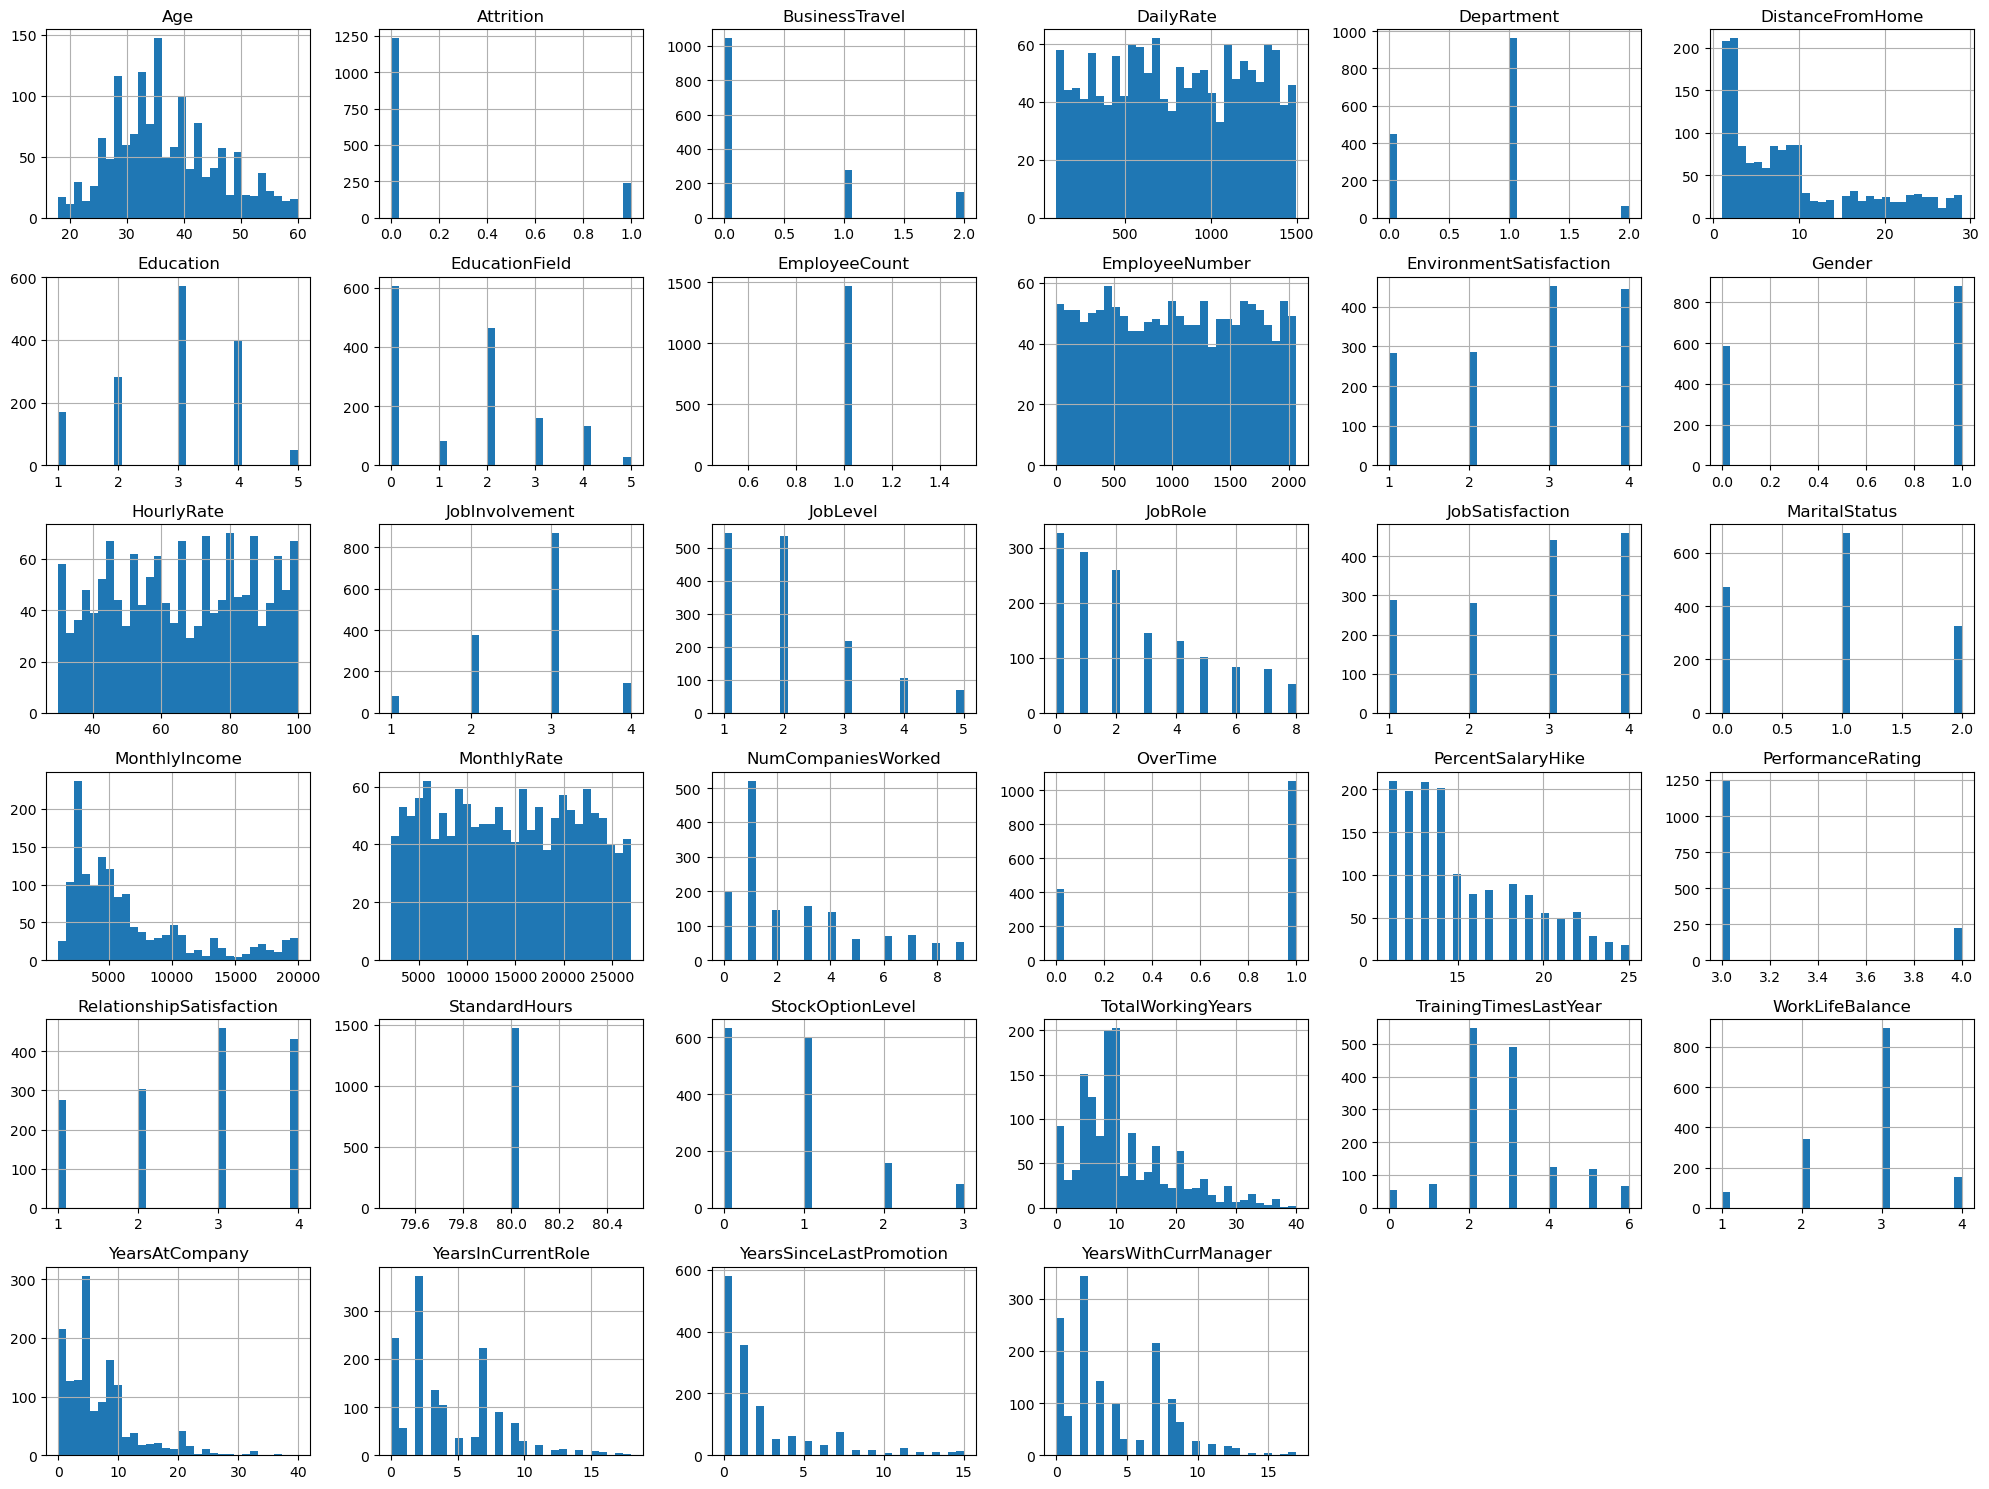

In [505]:
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

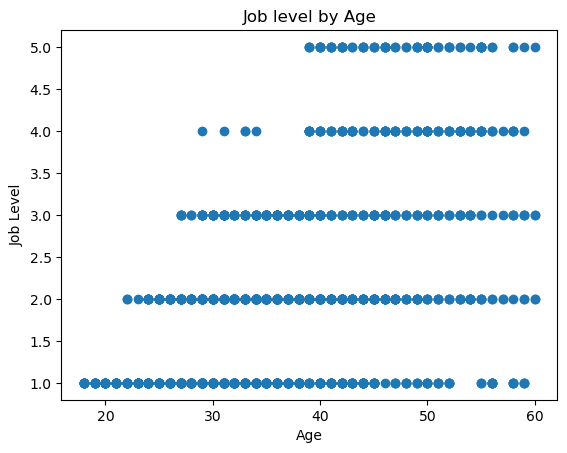

In [506]:
plt.scatter(data['Age'], data['JobLevel'],  marker="o", picker=True)
plt.title(f'Job level by Age')
plt.xlabel('Age')
plt.ylabel('Job Level')
plt.show()

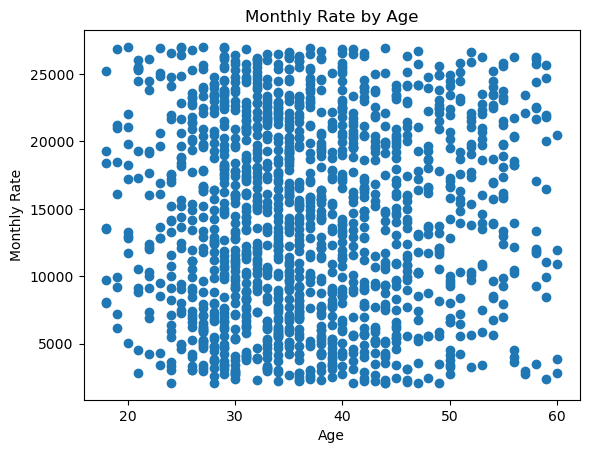

In [507]:
plt.scatter(data['Age'], data['MonthlyRate'],  marker="o", picker=True)
plt.title(f'Monthly Rate by Age')
plt.xlabel('Age')
plt.ylabel('Monthly Rate')
plt.show()

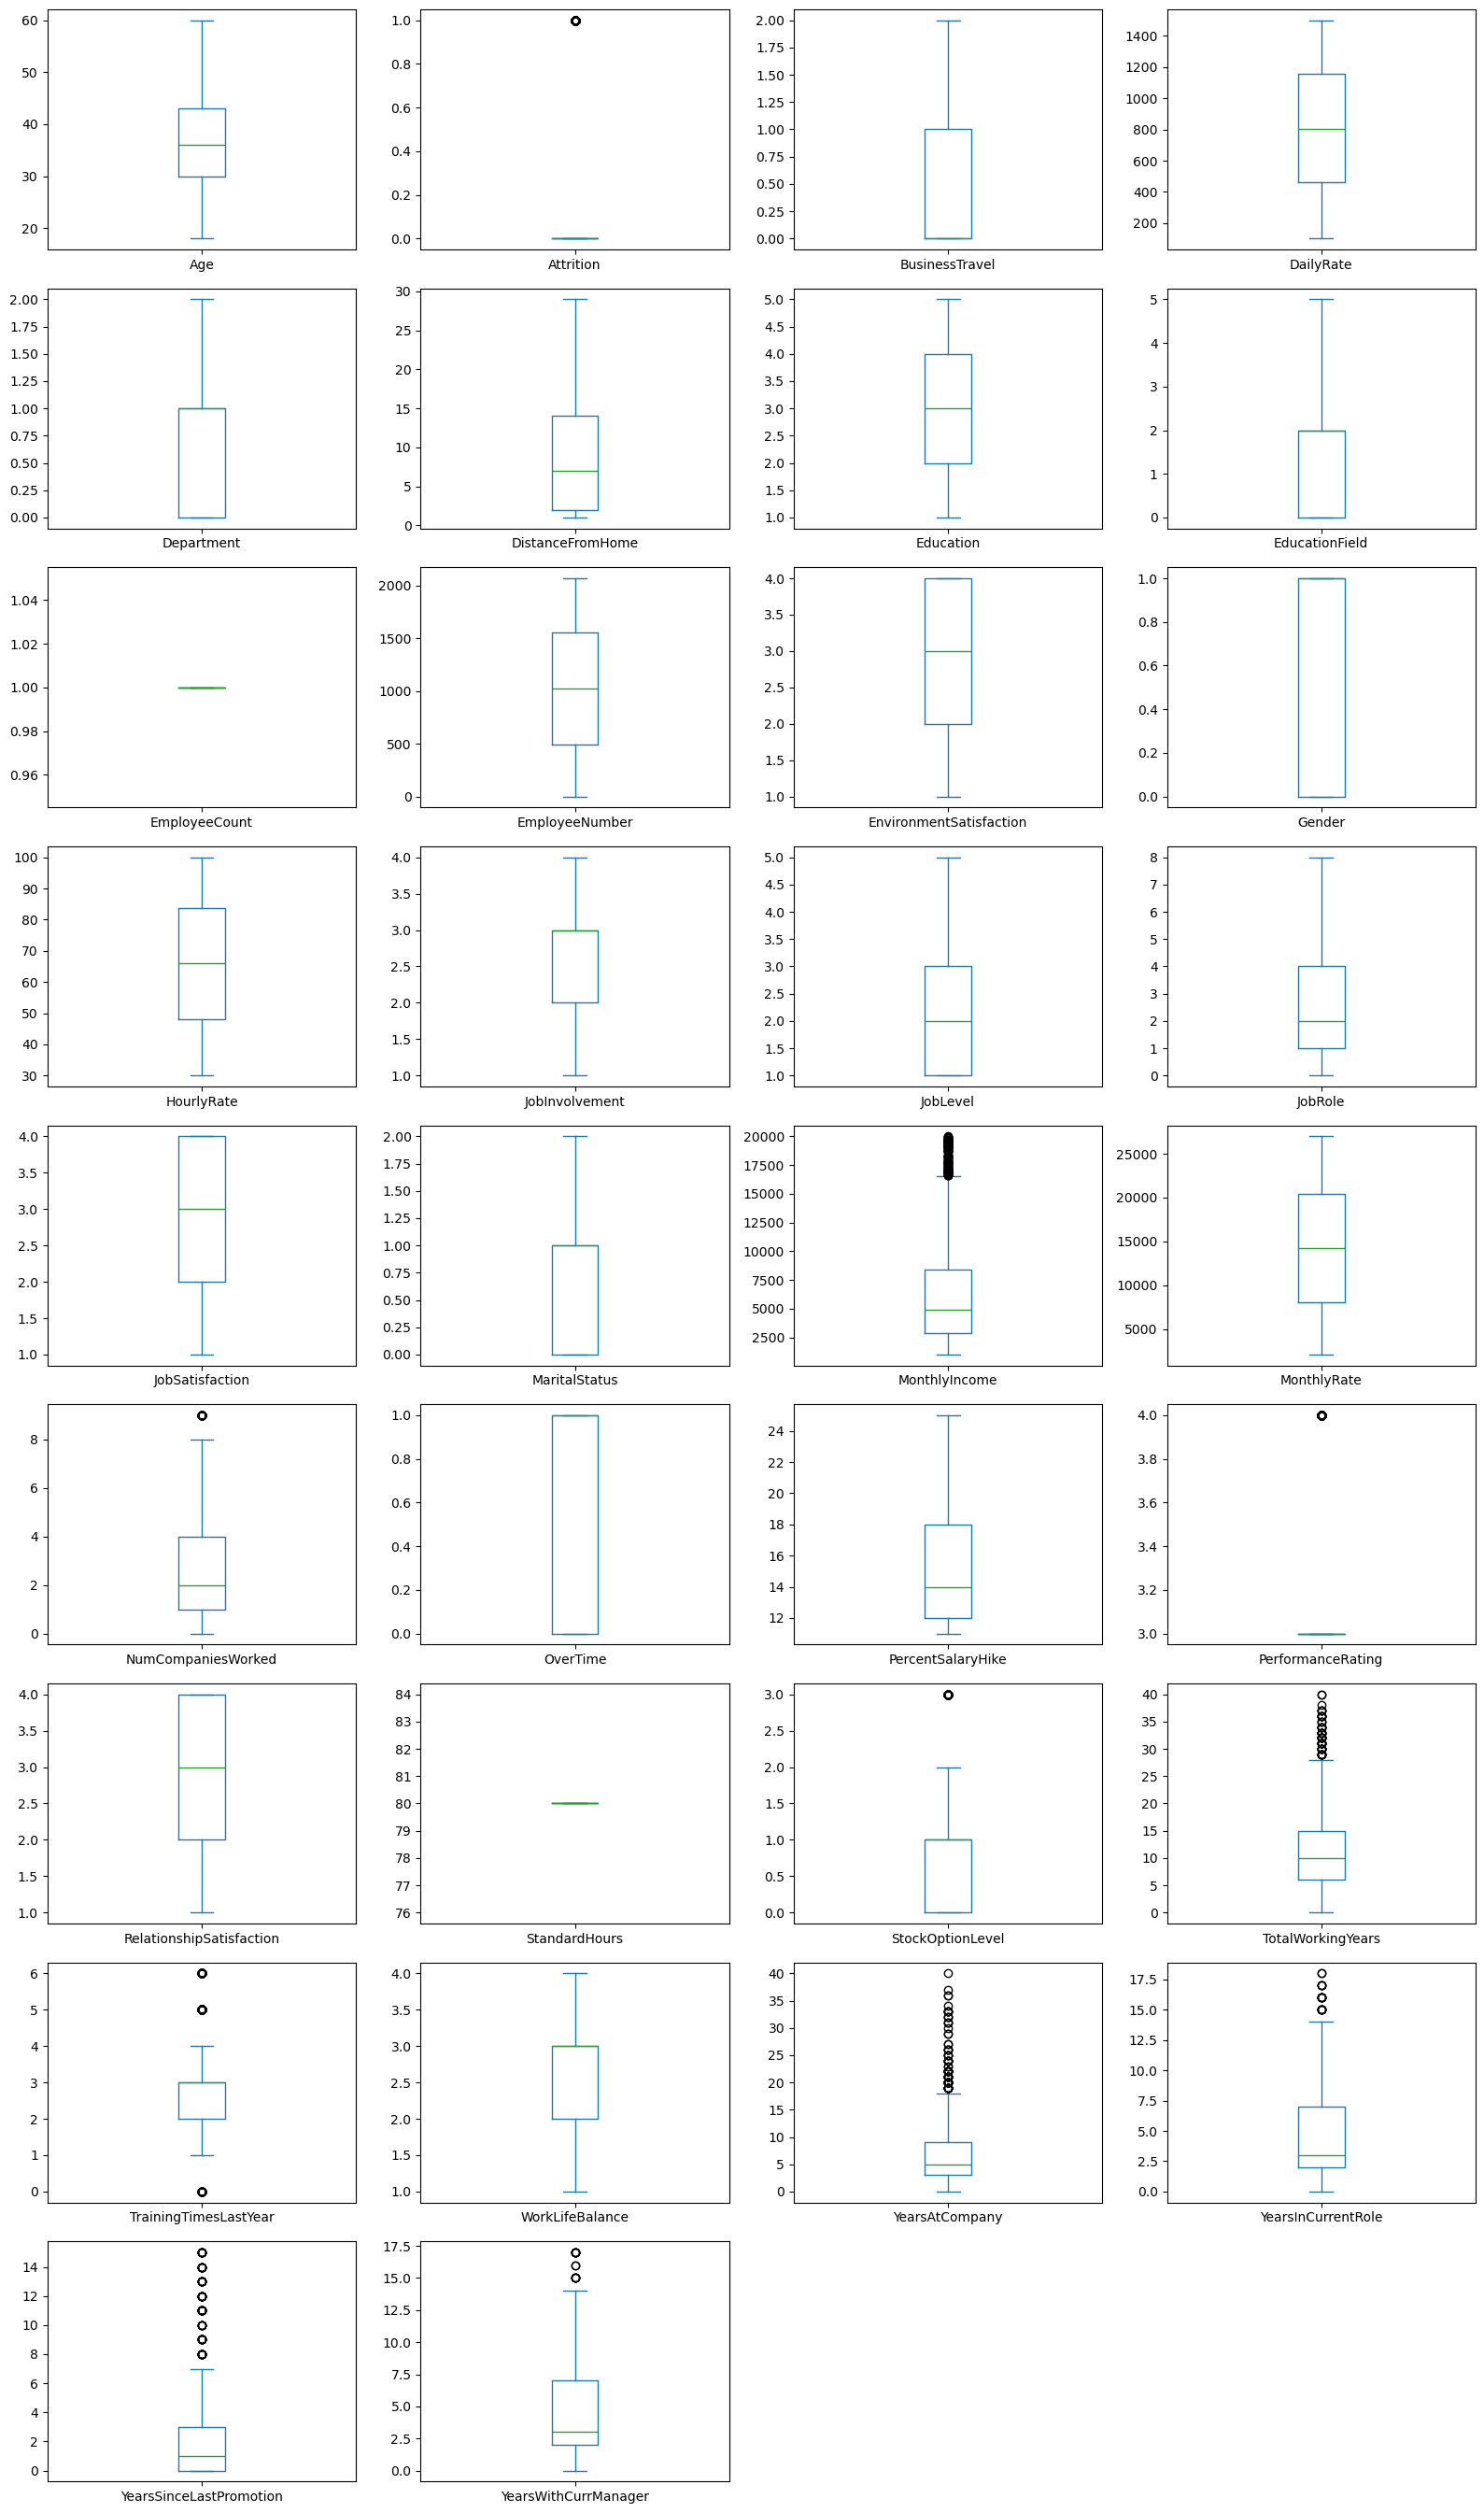

In [508]:
import math

num_columns = len(data.columns)
cols = 4
rows = math.ceil(num_columns / cols)

data.plot(kind='box', subplots=True, layout=(rows, cols), figsize=(4 * cols, 3 * rows), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [509]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [510]:
# Move 'Attrition' column to the end
cols = [col for col in data.columns if col != 'Attrition'] + ['Attrition']
data = data[cols]

In [511]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,0,1102,0,1,2,0,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,0,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,0,1373,1,2,2,1,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,0,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,0,591,1,2,1,2,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [512]:
# Convert the dataset into array
array = data.values

In [513]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [514]:
# Separate input data into classes based on labels of 'Attrition'
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

In [515]:
set_prop = 0.2

seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [516]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 33)
(1176,)
(294, 33)
(294,)


In [517]:
print("Unique values in y_train:", np.unique(y_train))

Unique values in y_train: [0 1]


In [518]:
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [519]:
data.shape

(1470, 34)

In [520]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=data.columns[:33], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True) 

In [521]:
graph = graphviz.Source(dot_data)
graph.render("company") 

'company.pdf'

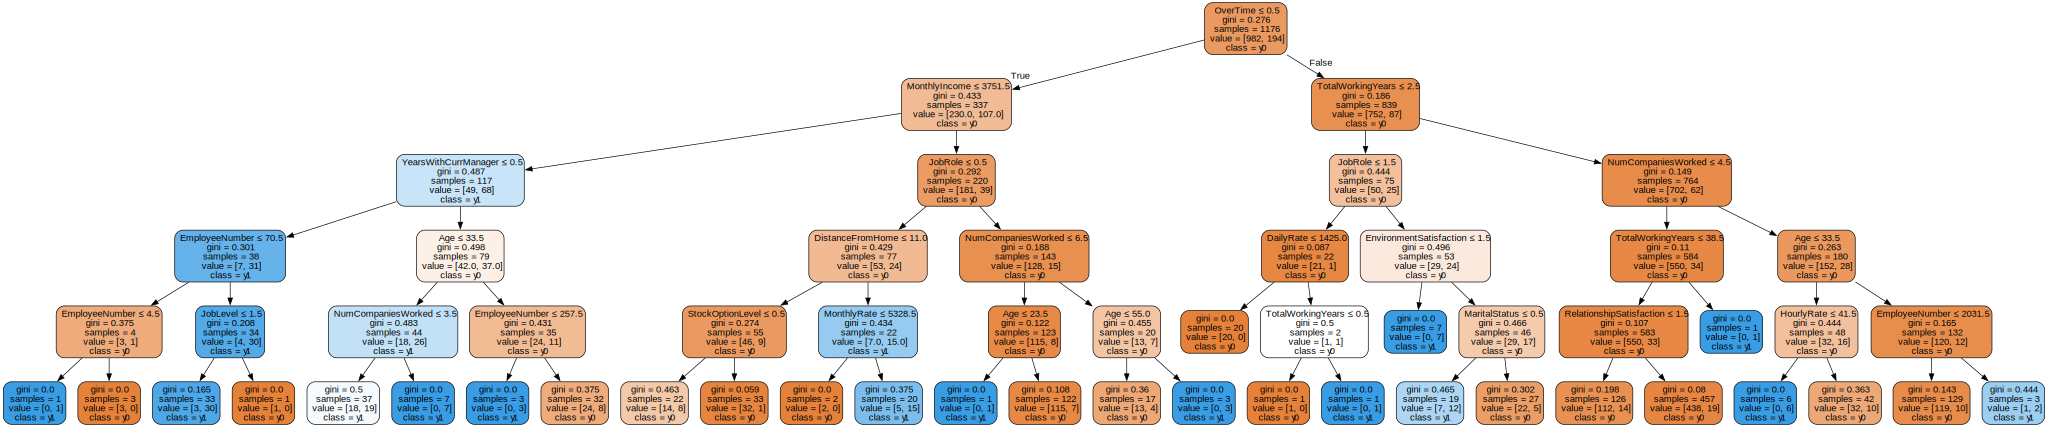

In [522]:
graph

In [523]:
# Set the metrics
scoring = 'accuracy'

In [524]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [525]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.8299319727891157


In [526]:
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[230,  21],
       [ 29,  14]], dtype=int64)

In [527]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0,1
row_0,,
0,230,21
1,29,14


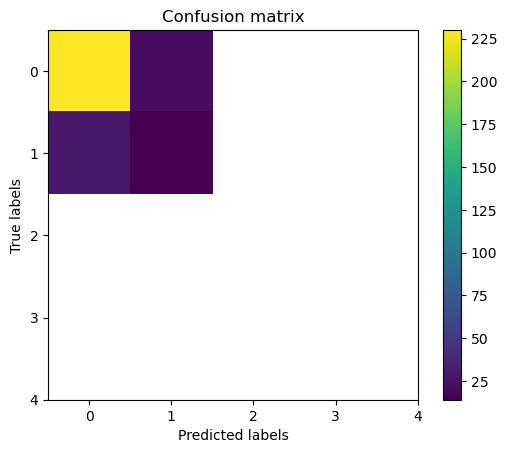

In [528]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

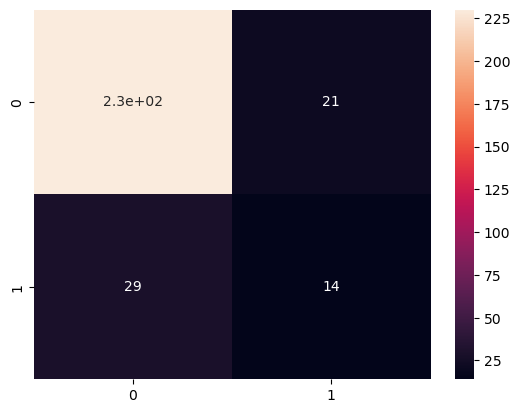

In [529]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [530]:
class_names = ['No Attrition', 'Attrition']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.92      0.97      0.94       982
   Attrition       0.76      0.56      0.64       194

    accuracy                           0.90      1176
   macro avg       0.84      0.76      0.79      1176
weighted avg       0.89      0.90      0.89      1176



In [531]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.89      0.92      0.90       251
   Attrition       0.40      0.33      0.36        43

    accuracy                           0.83       294
   macro avg       0.64      0.62      0.63       294
weighted avg       0.82      0.83      0.82       294

